In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical

In [149]:
df = pd.read_csv("Churn_Modelling.csv")

In [151]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [153]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [155]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [157]:
numeric_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=23)

In [161]:
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [163]:
from tensorflow.keras.utils import to_categorical

# Etiketleri one-hot encoding'e dönüştürme
y_train = to_categorical(y_train, num_classes=2)  # Çıkışta 2 sınıf var
y_test = to_categorical(y_test, num_classes=2)

# Veri türlerini float32'ye dönüştürme
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)


In [165]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

C:\Users\sinan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [167]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7972 - loss: 0.5302 - val_accuracy: 0.7973 - val_loss: 0.4632
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4536 - val_accuracy: 0.8060 - val_loss: 0.4478
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4495 - val_accuracy: 0.8177 - val_loss: 0.4356
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - loss: 0.4369 - val_accuracy: 0.8187 - val_loss: 0.4275
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8140 - loss: 0.4354 - val_accuracy: 0.8137 - val_loss: 0.4226
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8120 - loss: 0.4380 - val_accuracy: 0.8263 - val_loss: 0.4165
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4327 - val_accuracy: 0.8323 - val_loss: 0.4086
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.3960 - val_accuracy: 0.

In [171]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8627


In [173]:
y_pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [175]:
# y_test ve y_pred'i tek boyutlu hale getirme
y_test_classes = np.argmax(y_test, axis=1)  # Gerçek sınıflar
y_pred_classes = np.argmax(y_pred, axis=1)  # Tahmin edilen sınıflar

# Performans metriklerini hesaplama
print("Accuracy: ", accuracy_score(y_test_classes, y_pred_classes))
print("Precision: ", precision_score(y_test_classes, y_pred_classes))
print("Recall: ", recall_score(y_test_classes, y_pred_classes))
print("F1 Score: ", f1_score(y_test_classes, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_matrix)

# Confusion matrix detayları
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


Accuracy:  0.8626666666666667
Precision:  0.7654986522911051
Recall:  0.4663382594417077
F1 Score:  0.5795918367346938
[[2304   87]
 [ 325  284]]
True Negatives (TN): 2304
False Positives (FP): 87
False Negatives (FN): 325
True Positives (TP): 284


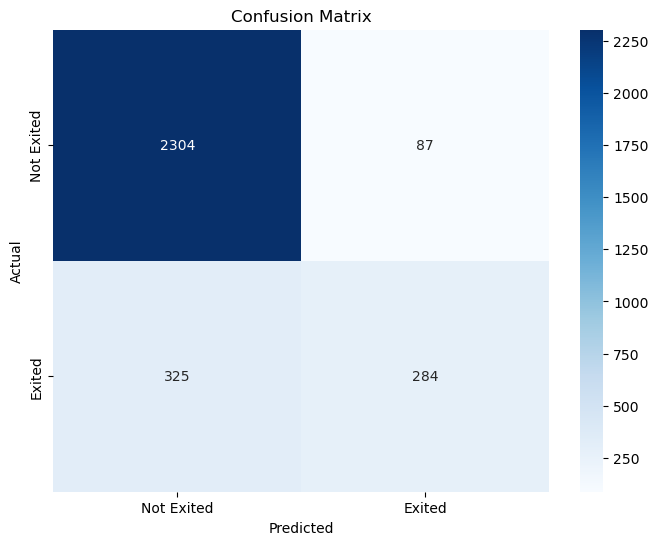

In [177]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

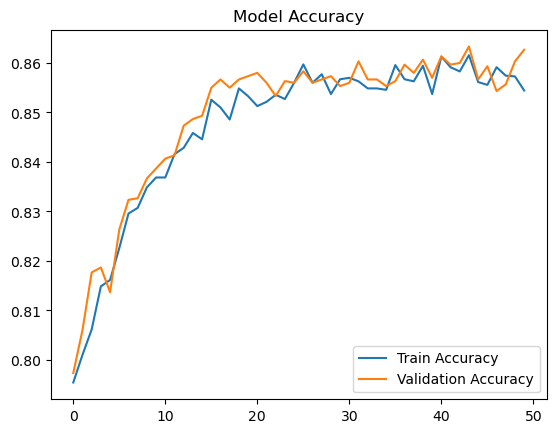

In [179]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


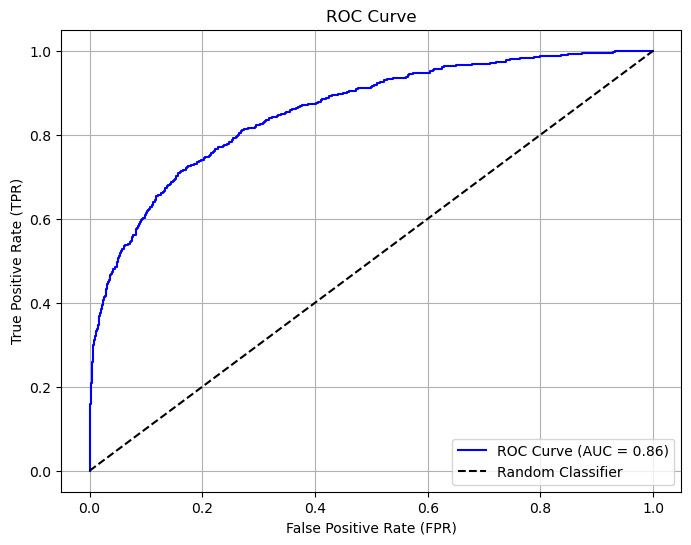

In [181]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

y_test_classes = np.argmax(y_test, axis=1)

y_prob = model.predict(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test_classes, y_prob)
auc = roc_auc_score(y_test_classes, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


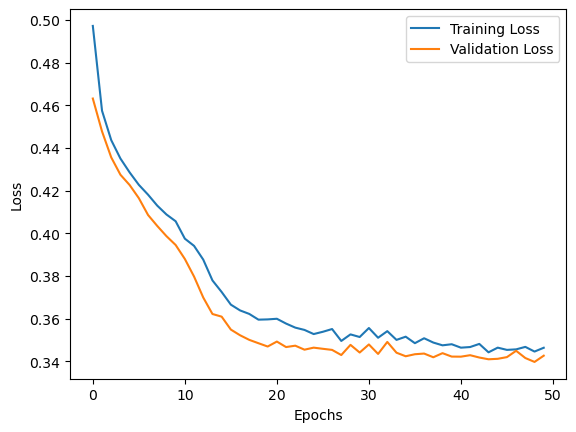

In [183]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()